In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


                  RE           site  \
0         M.Aac9709I           GATC   
1           M.AacDam           GATC   
2         M.AalSMS7I         TGAATC   
3        M.AalSMS7II    AGCNNNNRTCA   
4        S.AalSMS7II    AGCNNNNRTCA   
...              ...            ...   
11425       M.ZmoIII          GANTC   
11426    M.Zmo29192I  ACANNNNNNRTGG   
11427    S.Zmo29192I  ACANNNNNNRTGG   
11428   M.Zmo29192II         GATATC   
11429  M.Zmo29192III          GANTC   

                                                sequence  siteLen  seqLen  
0      MPEPAKPATPAKSRPFLKWAGGKYRLMDEINRLLPKRKQCLVEPFV...        4     284  
1      MPEPAKPATPAKSRPFLKWAGGKYRLMDEINRLLPKRKQCLVEPFV...        4     284  
2      MSKEKETTENPMEKVQSHDWNKERLEQLKQLMPDLFTNDGALNINE...        6     659  
3      MAKKTTTKEKSIEESLWDAANKLRGSIEPSEYKHVVLGLIFLKFAS...       11     521  
4      MQSNYRPIGDYIQLVDERNVDLQVTTLLGLSISKQFIHSVANTVGT...       11     417  
...                                                  ...      ...     ...  

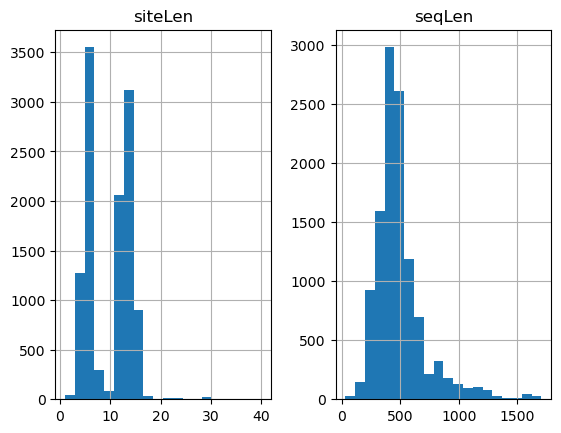

In [2]:
dataDir = '/home/allen/projects/DATA/bsp'
csvFile = 'protein_seqs_cleaned.csv'

dataDf = pd.read_csv( os.path.join( dataDir, csvFile ) )
dataDf['siteLen'] = dataDf['site'].map( lambda x: len(x) )
dataDf['seqLen'] = dataDf['sequence'].map( lambda x: len(x) )

print(dataDf)
print(dataDf.describe())
dataDf.hist(bins=20)
print('unique sequences:', len(set(dataDf.sequence)) )

print('unique sites:', len(set(dataDf.site)) )


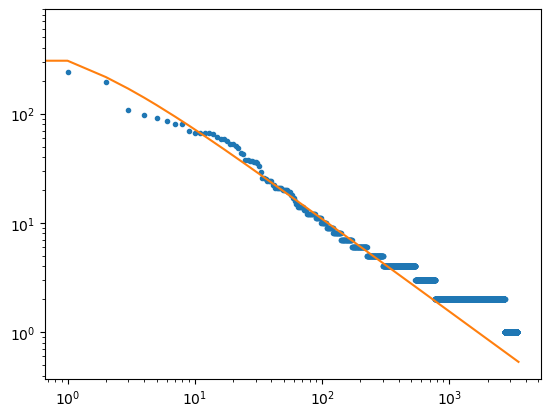

In [5]:
# frequency of site sequences

siteCounts=list(dataDf.site.value_counts())
siteCounts.sort()
siteCounts.reverse()

xx=550/np.linspace(1,3500,3500)**0.85
'''
plt.figure(1)
plt.semilogy(siteCounts,'.')
plt.semilogy(xx)
'''
plt.figure(2)
plt.loglog(siteCounts,'.')
plt.semilogy(xx)

In [6]:
# character use

# now create character use list, print
sitesConcat = ''.join(dataDf.site)
charList = list( set( sitesConcat ).difference({'A','C','G','T','N'}) )
charList.sort()
charList = ['A','C','G','T','N'] + charList
print( '\ncharacter set:', charList )


character set: ['A', 'C', 'G', 'T', 'N', 'B', 'D', 'H', 'K', 'M', 'R', 'S', 'V', 'W', 'Y']


<BarContainer object of 15 artists>

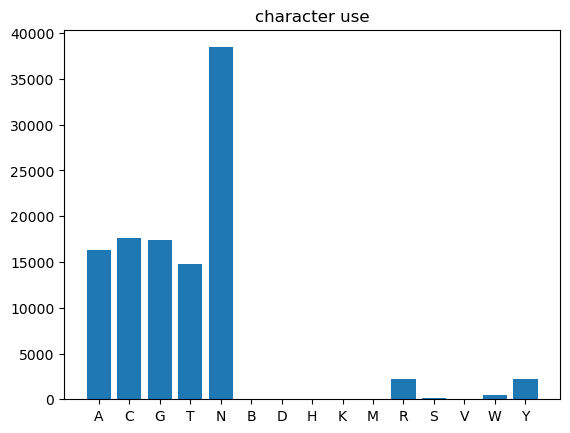

In [7]:
# count character use and plot
charCounts = []
for c in charList:
    charCounts.append( sitesConcat.count(c) )
plt.figure(2)
plt.title('character use')
plt.bar(range(len(charCounts)),charCounts,tick_label=charList) 

In [8]:
charCounts

[16275,
 17649,
 17447,
 14825,
 38454,
 62,
 51,
 40,
 45,
 36,
 2245,
 99,
 49,
 426,
 2228]

In [ ]:
# how many sites contain each characters

charCounts = []
for c in charList:
    charCounts.append( sitesConcat.count(c) )
plt.figure(2)
plt.title('character use')
plt.bar(range(len(charCounts)),charCounts,tick_label=charList) 